In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Update path to your actual location
data_dir = "C:\\Users\\vaibh\\Downloads\\drowsiness-detection"

# Create generators with validation split
train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255  # Add rescaling if needed
)

# Train generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(32,32),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'  # This will use 80% for training
)

# Validation generator (using same source directory)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(32,32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # This will use 20% for validation
)


Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [3]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
#    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [4]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [5]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [6]:
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10

2123/2123 [==============================] - 856s 403ms/step - loss: 0.1600 - categorical_accuracy: 0.9392 - precision: 0.9392 - recall: 0.9392 - val_loss: 0.1927 - val_categorical_accuracy: 0.9210 - val_precision: 0.9210 - val_recall: 0.9210
Epoch 2/10
2123/2123 [==============================] - 122s 57ms/step - loss: 0.0576 - categorical_accuracy: 0.9799 - precision: 0.9799 - recall: 0.9799 - val_loss: 0.3201 - val_categorical_accuracy: 0.8771 - val_precision: 0.8771 - val_recall: 0.8771
Epoch 3/10
2123/2123 [==============================] - 121s 57ms/step - loss: 0.0407 - categorical_accuracy: 0.9855 - precision: 0.9855 - recall: 0.9855 - val_loss: 0.2973 - val_categorical_accuracy: 0.8996 - val_precision: 0.8996 - val_recall: 0.8996
Epoch 4/10
2123/2123 [==============================] - 130s 61ms/step - loss: 0.0327 - categorical_accuracy: 0.9881 - precision: 0.9881 - recall: 0.9881 - val_loss: 0.3010 - val_categorical_accuracy: 0.9088 - val_precision: 0.9088 - val_r

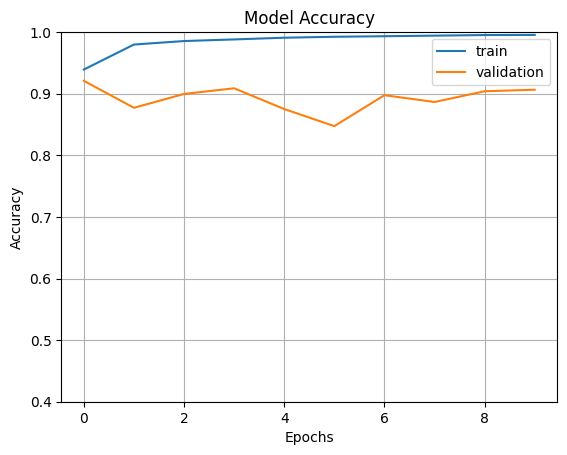

In [7]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [15]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("C:\\Users\\vaibh\\Downloads\\drowsiness-detection\closed\\s0037_05927_1_1_0_0_0_01.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [17]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("C:\\Users\\vaibh\\Downloads\\drowsiness-detection\closed\\s0037_05927_1_1_0_0_0_01.png")
print(image.shape)
r_eye = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(r_eye.shape)
r_eye = cv2.resize(r_eye, (img_height,img_width))
print(r_eye.shape)
#r_eye= r_eye/255
r_eye=  r_eye.reshape((-1, 32, 32, 3))
print(r_eye.shape)
#r_eye = np.expand_dims(r_eye,axis=0)
pred=cnn_model.predict(r_eye)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 114ms/step


In [18]:
np.argmax(pred)

0

In [20]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("C:\\Users\\vaibh\\Downloads\\drowsiness-detection\closed\\s0037_05927_1_1_0_0_0_01.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [21]:
pred=cnn_model.predict(image)

1/1 [==============================] - 0s 19ms/step


In [22]:
output_class=np.argmax(pred)
print("The predicted class is", output_class)
# 0 is close 1 is open

The predicted class is 0


In [23]:
cnn_model.save("./cnn.h5")

c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from keras.models import load_model
test_model = load_model('./cnn.h5')
pred = np.argmax(test_model.predict(image), axis=-1)
print(pred)

1/1 [==============================] - 0s 76ms/step
[0]


In [25]:
resnet50_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model.add(pretrained_model)

94765736/94765736 [==============================] - 8s 0us/step


In [26]:
resnet50_model.add(Flatten())
resnet50_model.add(Dense(128, activation='relu'))
resnet50_model.add(Dense(2, activation='softmax'))

In [27]:
resnet50_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 23850242 (90.98 MB)
Trainable params: 262530 (1.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [28]:
resnet50_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
2123/2123 [==============================] - 149s 69ms/step - loss: 0.4752 - categorical_accuracy: 0.7784 - precision_1: 0.7784 - recall_1: 0.7784 - val_loss: 0.4029 - val_categorical_accuracy: 0.8364 - val_precision_1: 0.8364 - val_recall_1: 0.8364
Epoch 2/10
2123/2123 [==============================] - 143s 68ms/step - loss: 0.4130 - categorical_accuracy: 0.8268 - precision_1: 0.8268 - recall_1: 0.8268 - val_loss: 0.5398 - val_categorical_accuracy: 0.7065 - val_precision_1: 0.7065 - val_recall_1: 0.7065
Epoch 3/10
2123/2123 [==============================] - 141s 67ms/step - loss: 0.3933 - categorical_accuracy: 0.8372 - precision_1: 0.8372 - recall_1: 0.8372 - val_loss: 0.4659 - val_categorical_accuracy: 0.7548 - val_precision_1: 0.7548 - val_recall_1: 0.7548
Epoch 4/10
2123/2123 [==============================] - 137s 65ms/step - loss: 0.3680 - categorical_accuracy: 0.8507 - precision_1: 0.8507 - recall_1: 0.8507 - val_loss: 0.3590 - val_categorical_accuracy: 0.8286 - val

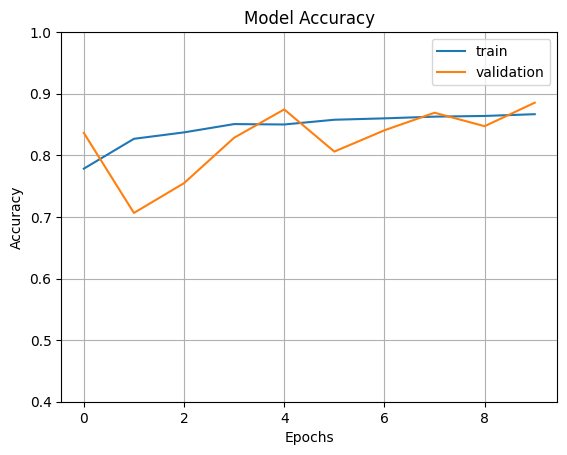

In [29]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [30]:
resnet50_model.save("./resnet50.h5")

In [31]:
resnet50_model_regularized = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model_regularized.add(pretrained_model)

In [32]:
resnet50_model_regularized.add(Flatten())
resnet50_model_regularized.add(Dense(128, activation='relu'))
resnet50_model_regularized.add(Dropout(0.5))
resnet50_model_regularized.add(Dense(2, activation='softmax'))

In [33]:
resnet50_model_regularized.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_model_regularized.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
2123/2123 [==============================] - 142s 66ms/step - loss: 0.6385 - categorical_accuracy: 0.6180 - precision_2: 0.6180 - recall_2: 0.6180 - val_loss: 0.5672 - val_categorical_accuracy: 0.7916 - val_precision_2: 0.7916 - val_recall_2: 0.7916
Epoch 2/10
2123/2123 [==============================] - 137s 65ms/step - loss: 0.6120 - categorical_accuracy: 0.6525 - precision_2: 0.6525 - recall_2: 0.6525 - val_loss: 0.5160 - val_categorical_accuracy: 0.8568 - val_precision_2: 0.8568 - val_recall_2: 0.8568
Epoch 3/10
2123/2123 [==============================] - 140s 66ms/step - loss: 0.6064 - categorical_accuracy: 0.6594 - precision_2: 0.6594 - recall_2: 0.6594 - val_loss: 0.4918 - val_categorical_accuracy: 0.8675 - val_precision_2: 0.8675 - val_recall_2: 0.8675
Epoch 4/10
2123/2123 [==============================] - 138s 65ms/step - loss: 0.6028 - categorical_accuracy: 0.6616 - precision_2: 0.6616 - recall_2: 0.6616 - val_loss: 0.5223 - val_categorical_accuracy: 0.8491 - val

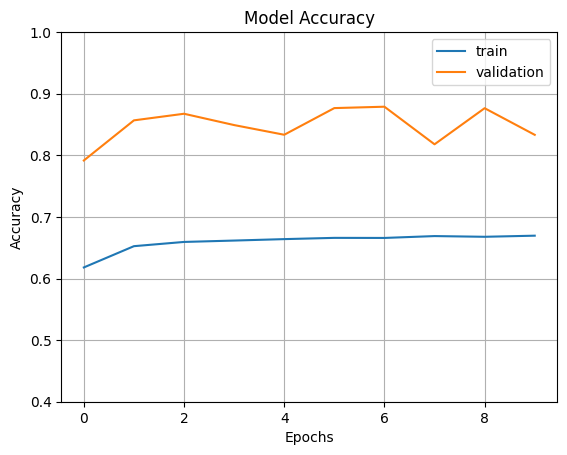

In [34]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [35]:
resnet50_model_regularized.save("./resnet50_model_regularized.h5")

<a href="./resnet50_model_regularized.h5"> Download ResNet50 Regularized File </a>

In [37]:
rresnet50_fine_tune1 = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(32,32,3),
    pooling='avg',
    weights='imagenet'
)
for layer in pretrained_model.layers:
    layer.trainable = True

resnet50_fine_tune1.add(pretrained_model)


In [38]:
resnet50_fine_tune1.add(Flatten())
resnet50_fine_tune1.add(Dense(128, activation='relu'))
resnet50_fine_tune1.add(Dropout(0.5))
resnet50_fine_tune1.add(Dense(2, activation='softmax'))

In [39]:
resnet50_fine_tune1.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_fine_tune1.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
2123/2123 [==============================] - 714s 329ms/step - loss: 0.1025 - categorical_accuracy: 0.9684 - precision_3: 0.9684 - recall_3: 0.9684 - val_loss: 0.1885 - val_categorical_accuracy: 0.9096 - val_precision_3: 0.9096 - val_recall_3: 0.9096
Epoch 2/10
2123/2123 [==============================] - 686s 323ms/step - loss: 0.1157 - categorical_accuracy: 0.9646 - precision_3: 0.9646 - recall_3: 0.9646 - val_loss: 0.3502 - val_categorical_accuracy: 0.8710 - val_precision_3: 0.8710 - val_recall_3: 0.8710
Epoch 3/10
2123/2123 [==============================] - 688s 324ms/step - loss: 0.1005 - categorical_accuracy: 0.9674 - precision_3: 0.9674 - recall_3: 0.9674 - val_loss: 0.2575 - val_categorical_accuracy: 0.9016 - val_precision_3: 0.9016 - val_recall_3: 0.9016
Epoch 4/10
2123/2123 [==============================] - 685s 323ms/step - loss: 0.1113 - categorical_accuracy: 0.9650 - precision_3: 0.9650 - recall_3: 0.9650 - val_loss: 0.2079 - val_categorical_accuracy: 0.9115 -

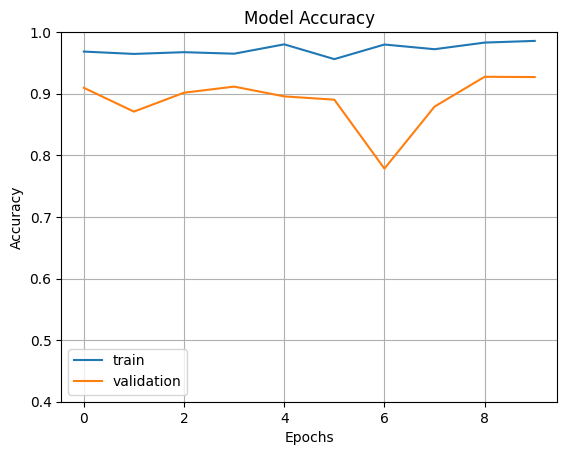

In [40]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [43]:
resnet50_fine_tune1.save("./resnet50_fine_tune.h5")

<a href="./resnet50.h5"> Download ResNet50 File </a>

<a href="./resnet50_fine_tune.h5"> Download fine_tune ResNet50 File </a>